# Implement a linear regression model by minimizing sum of squared errors

with friendly explanations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

### Single variable

Let's start simple

In [2]:
# Generate sample data points
# let y = 3x + 4
x = np.random.randint(low=0, high=100, size=100)
df = pd.DataFrame({'x': x})
df['base_y'] = df.x.apply(lambda x: 3 * x + 4)
df['mod_y'] = df.base_y.apply(lambda y: y + 10 * np.random.normal())

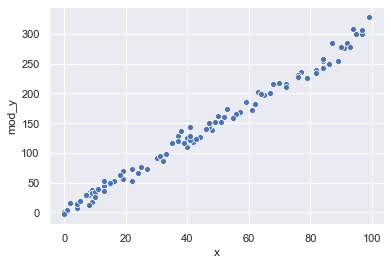

In [3]:
sns.scatterplot(data=df, x='x', y='mod_y')

### Solution

Suppose the real line is $y = ax + b$, then the sum of squared error is

$(ax_1+b-y_1)^2 + (ax_2+b-y_2)^2... + (ax_n+b-y_n)^2$

To minimize error w.r.t. $b$, take derivative w.r.t. it and set to 0:

$2(ax_1+b-y_1) + 2(ax_2+b-y_2)... + 2(ax_n+b-y_n) = 0$, simplified to

$$a(\Sigma_1^nx_i) + bn - \Sigma_1^ny_i = an\bar{x} + bn - n\bar{y} = 0$$
$$b = \bar{y} - a\bar{x}$$

To minimize the error with respect to $a$, take derivative w.r.t $a$ and set to 0:

$2x_1(ax_1+b-y_1) + 2x_2(ax_2+b-y_2) + ... 2x_n(ax_n + b - y_n) = 0$, simplified to

$$a\Sigma x_i^2 + b\Sigma x_i - \Sigma x_iy_i = 0$$

Substituting solution for $y$, we get

$$a\Sigma x_i^2 + \Sigma x_i(\bar{y} - a\bar{x}) - \Sigma x_iy_i = 0$$
$$a(\Sigma x_i^2 - n\bar{x}^2) = \Sigma x_iy_i - n\bar{y}\bar{x}$$
$$a = \frac{\Sigma x_iy_i - n\bar{y}\bar{x}}{\Sigma x_i^2 - n\bar{x}^2}$$

This means we don't need to "fit", we can just calculate!

In [4]:
class LinearRegressor:
    def __init__(self):
        self.slope = None
        self.intercept = None
    def fit(self, x, y):
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        n = len(x)
        a_numerator = sum([x_i*y_i for x_i, y_i in zip(x, y)]) - n * x_mean * y_mean
        a_denominator = sum([x_i**2 for x_i in x]) - n * (x_mean ** 2)
        self.slope = 1.0 * a_numerator / a_denominator
        self.intercept = y_mean - self.slope * x_mean
    def predict(self, x):
        if self.slope is None:
            raise ValueError("Please fit first")
        if isinstance(x, float):
            return self.slope * x + self.intercept
        elif isinstance(x, pd.DataFrame):
            return x.apply(lambda val: val * self.slope + self.intercept)
        else:
            return [val * self.slope + self.intercept for val in x]
    def summary(self):
        return self.slope, self.intercept

In [5]:
model = LinearRegressor()
model.fit(df.x, df.mod_y)
df['predicted'] = model.predict(df.x)

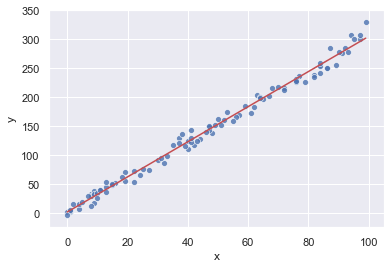

In [6]:
sns.lineplot(data=df, x='x', y='predicted', color='r')
sns.scatterplot(data=df, x='x', y='mod_y', alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Multivariant linear regression

What if we have more than one dimensions in x?

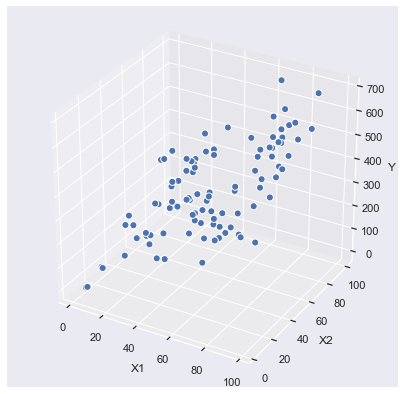

In [7]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# y = 4 * x1 + 3 * x2
x1 = np.random.randint(low=0, high=100, size=100)
x2 = np.random.randint(low=0, high=100, size=100)
y = [4 * x1_i + 3 * x2_i for x1_i, x2_i in zip(x1, x2)]
y = [val + 50 * np.random.normal() for val in y]
ax.scatter(x1, x2, y, s=50, alpha=1, edgecolors='w')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

Suppose the space is $n + 1$ dimensions and there are $m >= n + 1$ sampless. Each target variable $y$ has the form $y = w_0 + w_1x_1 + w_2x_2 + ... w_nx_n$. Error for each sample is 

$e^2 = (y - w_0 - w_1x_1 - w_2x_2 - ... w_nx_n)^2$, giving the following overal loss function,

$\Sigma_1^m e_i^2 = \Sigma_1^m (y_i - w_0 - w_1x_{i1} - w_2x_{i2} - ... -w_nx_{in})^2$

Following the same approach as single-variable linear regresion, take derivative w.r.t. each weight and set to 0. We get $n + 1$ equations

$$\Sigma (y_i - w_0 - w_1x_{i1} - w_2x_{i2} ... - w_nx_{in}) = 0$$
$$\Sigma x_{i1}(y_i - w_0 - w_1x_{i1} - w_2x_{i2} ... - w_nx_{in}) = 0$$
$$...$$
$$\Sigma x_{in}(y_i - w_0 - w_1x_{i1} - w_2x_{i2} ... - w_nx_{in}) = 0$$

A more intuitive arrangement is

$$\Sigma y_i = \Sigma (w_0 + w_1x_{i1} + w_2x_{i2} ... + w_nx_{in})$$
$$\Sigma y_i x_{i1} = \Sigma x_{i1}(w_0 + w_1x_{i1} + w_2x_{i2} ... + w_nx_{in})$$
$$...$$
$$\Sigma y_i x_{in} = \Sigma x_{in} (w_0 + w_1x_{i1} + w_2x_{i2} ... + w_nx_{in})$$

Putting to matrix form, left hand side is

$$
\begin{bmatrix} 
1 & 1 & 1 & ... & 1 \\
x_{11} & x_{21} & x_{31} & ... & x_{m1} \\
... \\
x_{1n} & x_{2n} & ... & ... & x_{mn}
\end{bmatrix}
\begin{bmatrix} 
y_1 \\
y_2 \\
.\\
.\\
y_m
\end{bmatrix}
 = X^T Y
$$

Right hand side is

$$
\begin{bmatrix} 
\Sigma 1 & \Sigma x_{i1} & \Sigma x_{i2} & ... & \Sigma x_{in} \\
\Sigma x_{i1} & \Sigma x_{i1}x_{i1} & \Sigma x_{i1}x_{i2} & ... & \Sigma x_{i1}x_{in} \\
... \\
\Sigma x_{in} & \Sigma x_{in}x_{i1} & ... & ... & \Sigma x_{in}x_{in}
\end{bmatrix}
\begin{bmatrix} 
w_0 \\
w_1 \\
.\\
.\\
w_n
\end{bmatrix}
= 
\begin{bmatrix} 
1 & 1 & 1 & ... & 1 \\
x_{11} & x_{21} & x_{31} & ... & x_{m1} \\
... \\
x_{1n} & x_{2n} & ... & ... & x_{mn}
\end{bmatrix}
\begin{bmatrix} 
1 & x_{11} & x_{12} & ... & x_{1n} \\
1 & x_{21} & x_{22} & ... & x_{2n} \\
... \\
1 & x_{m1} & ... & ... & x_{mn}
\end{bmatrix}
\begin{bmatrix} 
w_0 \\
w_1 \\
.\\
.\\
w_n
\end{bmatrix}
= X^T X w
$$

left = right means $X^T Y = X^T X w$, or $$w = (X^T X)^{-1} X^T Y$$

What if $X^T X$ is not invertible? Then there must be redundancy in the variables and there can be multiple solutions. Use professional libraries in such case.

In [8]:
class MultvariantRegressor:
    def __init__(self):
        self.weights = None

    def fit(self, x, y):
        if isinstance(x, list):
            X = np.vstack(x).transpose()
        else:
            X = x
        Y = np.array(y).transpose()
        inversed = np.linalg.inv(np.matmul(X.transpose(), X))
        self.weights = np.matmul(np.matmul(inversed, X.transpose()), Y)
    def predict(self, x):
        if isinstance(x, list):
            X = np.vstack(x).transpose()
        else:
            X = x
        return np.matmul(X, self.weights)
    def summary(self):
        return self.weights

In [9]:
model = MultvariantRegressor()
model.fit([x1, x2], y)
pred = model.predict([x1, x2])

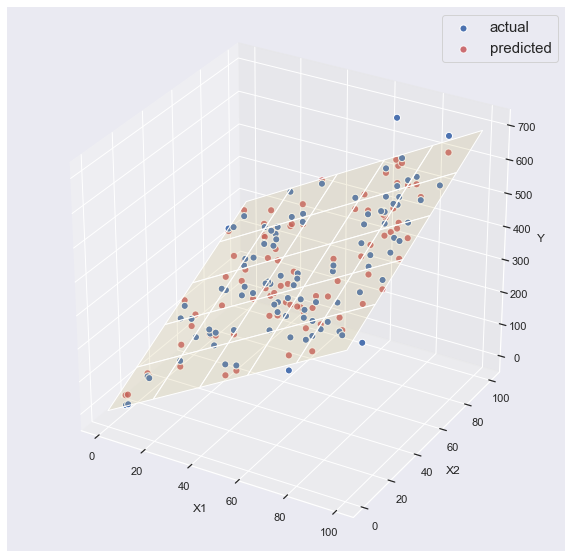

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(x1, x2, y, s=50, alpha=1, edgecolors='w', color='b', label='actual')
ax.scatter(x1, x2, pred, s=50, alpha=0.8, edgecolors='w', color='r', label='predicted')

def fun(val1, val2):
    return model.weights[0] * val1 + model.weights[1] * val2

x1_surface = x2_surface = np.arange(0, 120, 20)
x1_surface_pt, x2_surface_pt = np.meshgrid(x1_surface, x2_surface)
y_surface = np.array(fun(np.ravel(x1_surface_pt), np.ravel(x2_surface_pt)))
Z = y_surface.reshape(x1_surface_pt.shape)

ax.plot_surface(x1_surface_pt, x2_surface_pt, Z, color='y', alpha=0.2,
                shade=False)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.legend(fontsize=15)
plt.show()

Pretty good!